## Seaborn

matplotlib 기반의 시각화 라이브러리

유익한 통계 그래픽을 그리기 위한 고급 인터페이스를 제공한다

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Distribution Plot

Distribution Plot은 데이터의 분포를 시각화하는데 도움이 된다  
평균(mean), 중위수(median), 범위(range), 분산(variance), 편차(devation) 등을 이 그래프를 사용해 이해할 수 있다

#### 1. Hist Plot

- 변수에 대한 히스토그램을 표시
- 하나 혹은 두 개의 변수 분포를 나타내는 전형적인 시각화 도구  

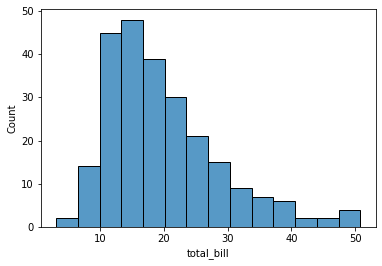

In [11]:
# total_bill 질량 분포
sns.histplot(x=df['total_bill'])
plt.show()

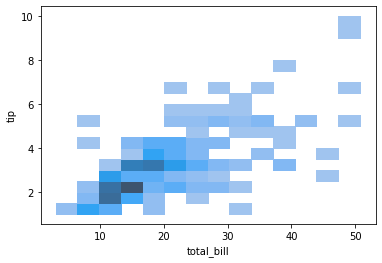

In [16]:
# total_bill 과 tip 에 대한 질량 분포
sns.histplot(x=df['total_bill'], y=df['tip'])
plt.show()

#### 2. KDE Plot

- 하나 혹은 두 개의 변수우에 대한 분표를 그린다  
- `histplot`은 절대량이라면 `kdeplot`은 밀도 추정치를 시각화한다  
- 결과물은 연속된 곡선 그래프로 나타난다

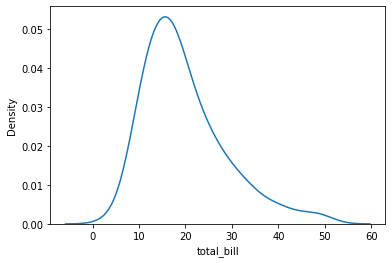

In [14]:
# 단일 변수에 대한 질량 밀도(추정) 그래프
sns.kdeplot(x=df['total_bill'])
plt.show()

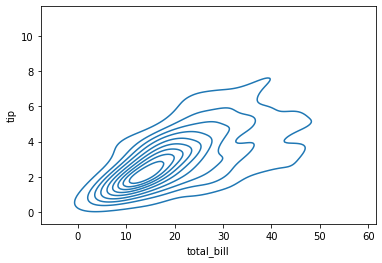

In [17]:
# 두개의 변수에 대한 질량 밀도(추정) 그래프
sns.kdeplot(x=df['total_bill'],y=df['tip'])
plt.show()

#### 3. ECDF Plot

- 누적 분포 시각화
- 실제 관측치의 비율을 시각화한다는 장점  

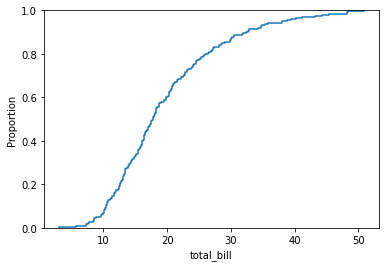

In [19]:
# 단일 변수에 대한 ecdf plot
sns.ecdfplot(x=df['total_bill'])
plt.show()

#### 4. RUG Plot

- x축과 y축을 따라 눈금을 그려서 주변 분포도를 표시
- 개발 관측치에 대한 위치를 보여줌으로써 다른 그림들을 보완하는데 주로 쓰인다

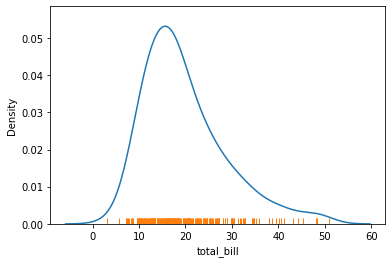

In [20]:
sns.kdeplot(x=df['total_bill'])
sns.rugplot(x=df['total_bill'])
plt.show()

주황색 선이 rugplot, 파란색 선이 kdeplot이다.  rugplot은 참고용이라고 알아두면 될듯하다

### Categorical Plot

Categorical Plot은 범주형 변수를 이해하는데 도움이 된다  
`일변량(univariate)` 혹은 `이변량(bivariate)` 분석에 사용된다

#### 1. Bar Plot

- 이변량 분석을 위한 plot
- x축에는 범주형 변수, y축에는 연속형 변수를 넣는다

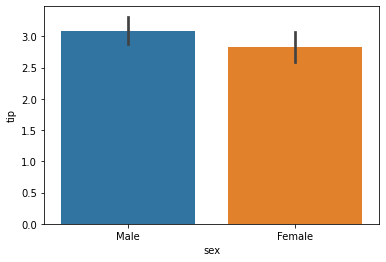

In [21]:
sns.barplot(x=df['sex'],y=df['tip'])
plt.show()

#### 2. Count Plot

- 범주형 변수의 발생 횟수를 샌다
- 일변량 분석이다

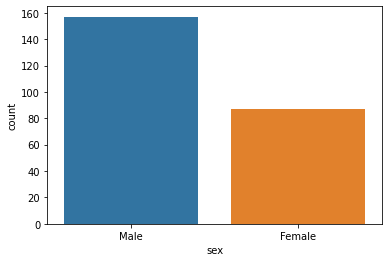

In [22]:
sns.countplot(x=df['sex'])
plt.show()

#### 3. Box Plot
- 최대, 최소, 평균, 1 사분위수, 3 사분위수를 보기 위한 그래프
- 특이치를 발견하기에도 좋다
- 단일 연속형 변수에 대해 수치를 표시하거나, 연속형 변수를 기반으로 서로 다른 범주형 변수를 분석이 가능하다

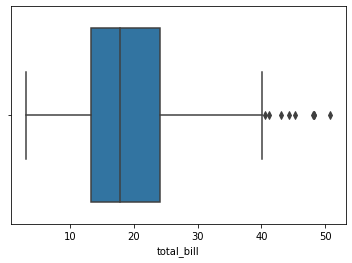

In [23]:
sns.boxplot(x=df['total_bill'])
plt.show()

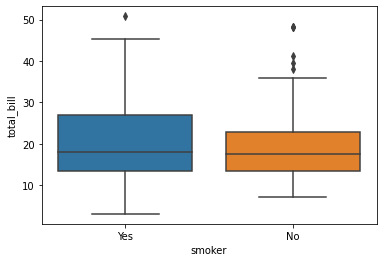

In [24]:
sns.boxplot(y=df['total_bill'], x=df['smoker'])

#### 4. Violin Plot

- Box Plot과 비슷하지만 분포에 대한 보충 정보가 제공된다

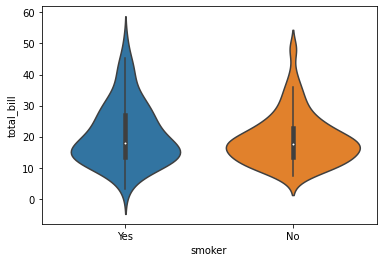

In [25]:
sns.violinplot(y=df['total_bill'],x=df['smoker'])
plt.show()

#### 5. Strip Plot

- 연속형 변수와 범주형 변수 사이의 그래프
- 산점도로 표시되는데, 범주형 변수의 인코딩을 추가로 사용한다

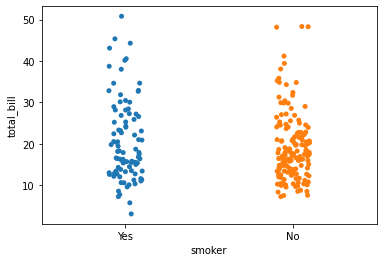

In [26]:
sns.stripplot(y=df['total_bill'], x=df['smoker'])
plt.show()

#### 6. Swarm Plot

- strip plot과 violin plot의 조합
- 데이터 포인트 수와 함께 각 데이터의 분포 제공

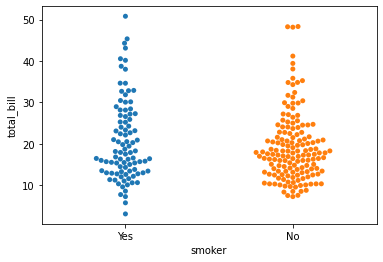

In [27]:
sns.swarmplot(y=df['total_bill'], x=df['smoker'])
plt.show()

### Matrix Plot

시가화를 위해 2차원 행렬 데이터를 사용하는 특별한 유형의 Plot  
매트릭스 데이터에서는 사이즈가 크기 때문에 패턴을 분석하고 생성하기 어렵다  
Matrix Plot은 매트릭스 데이터에 색상을 제공함으로써 조금 더 분석하기 쉽게 도와준다

1. Heat Map

- Heat Map을 통해 데이터 간의 수치에 따라 색상을 입힘으로써 직관적인 통찰을 얻을 수 있다

In [28]:
# 정수형 값들의 상관 행렬 만들기
df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


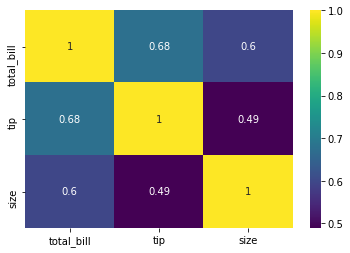

In [30]:
sns.heatmap(df.corr(), annot= True, cmap= 'viridis')
plt.show()

결측값도 확인이 가능하지만 현재 사용하는 데이터는 결측값이 없음으로 간단하게 코드만 알아보겠다

In [ ]:
# sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#### 2. Cluster Map

- 행렬 데이터를 가지고 있고, 유사성에 따라 몇몇 특징들을 그룹화하기 원한다면 Cluster Map을 사용하는것이 도움이 된다
- 유사도가 높은 것들 순서대로 계층적으로 클러스터가 형성된다 
  

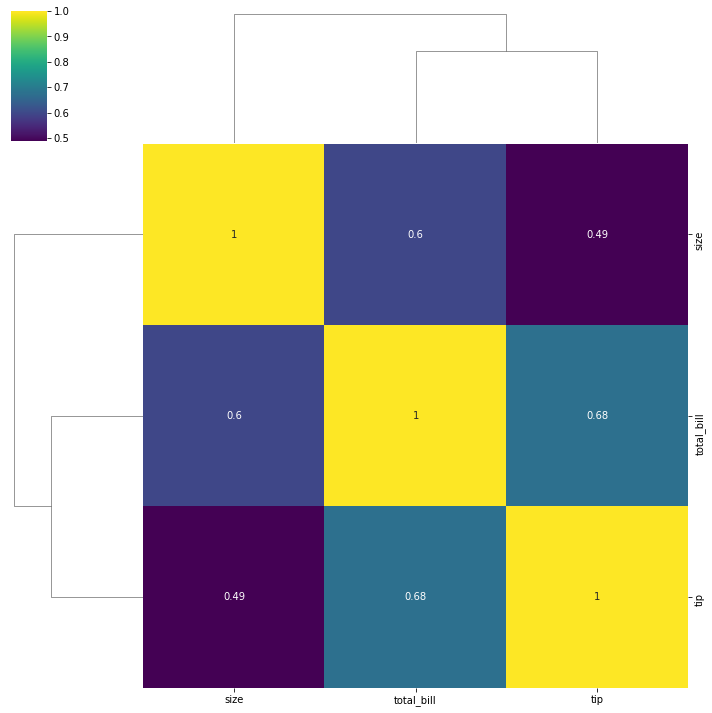

In [31]:
sns.clustermap(df.corr(), annot=True, cmap='viridis')
plt.show()

### Multi-Plot Grid

Grid Plot은 시각화에 대한 제어력을 높이고 코드 한 줄로 다양한 그래프를 표시한다

#### 1. Facet Grid

- 어떠한 조건에 따라 그래프를 각각 확인해보고 싶을 때 사용한다

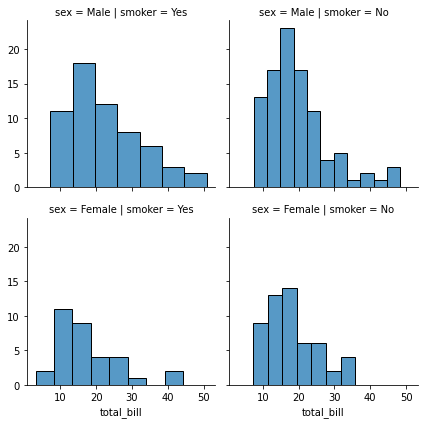

In [35]:
# 성별과 흡연 여부에 따라 얼마를 지불하는지 알고싶을때
sns.FacetGrid(df, col='smoker', row='sex').map(sns.histplot, 'total_bill')
plt.show()

#### 2. Joint Plot

- 두 변수에 대한 displot의 조합이다
- 두 변수에 분포에 대한 분석을 할 수 있다
- 두 displot 사이에 scatter plot이 추가되어 분포를 추가로 확인 가능
- scatter plot 대신 hex plot으로 정의 가능

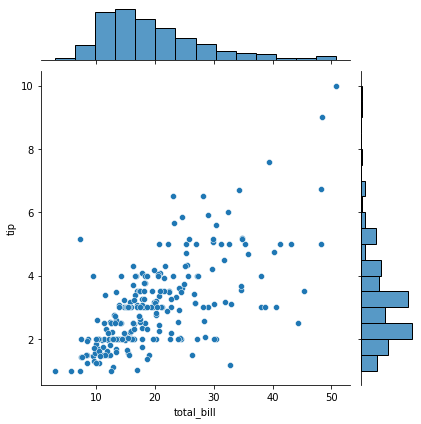

In [36]:
sns.jointplot(x=df['total_bill'], y=df['tip'], kind='scatter')
plt.show()

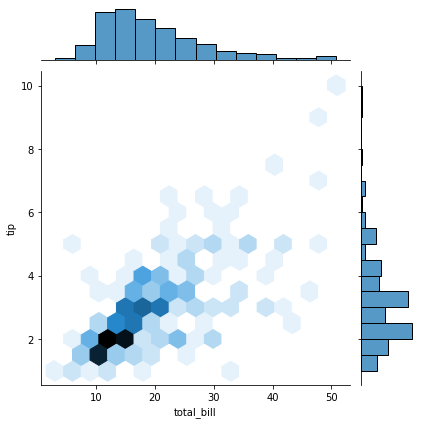

In [37]:
sns.jointplot(x=df['total_bill'], y=df['tip'], kind='hex')
plt.show()

#### 3. Pair Plot

- 데이터셋을 통째로 넣으면 숫자형 특성에 대하여 각각에 대한 히스토그램과 두 변수 사이의 scatter plot을 그린다
- 데이터를 한눈에 보기 쉬워서 애용된다
- 다른 기능이나 유연성이 더 필요하다면 pairgrid를 사용한다

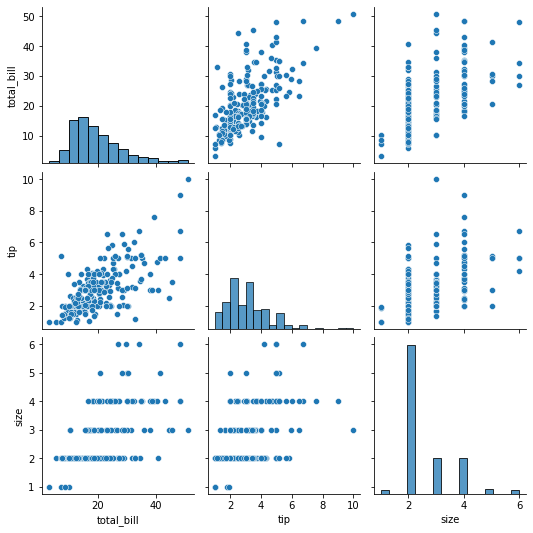

In [39]:
sns.pairplot(df)
plt.show()

### Regression Plot

Regression Plot은 regreesion 머신러닝의 결과를 그래프에 표기해준다  
즉 데이터를 있는 그대로 보여주는것이 아닌, 머신러닝 결과와 함께 보여준다

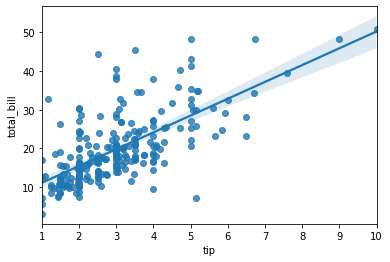

In [40]:
sns.regplot(x='tip', y='total_bill',data=df)
plt.show()

#### 1. LM Plot

- regplot()과 faceGrid의 결합
- hue에 들어간 컬럼의 값을 구분하여 따로따로 모델링하여 결과를 보여준다
- regression을 위한 여러 가지 옵션들이 있다 (공식 Documentation 참조)

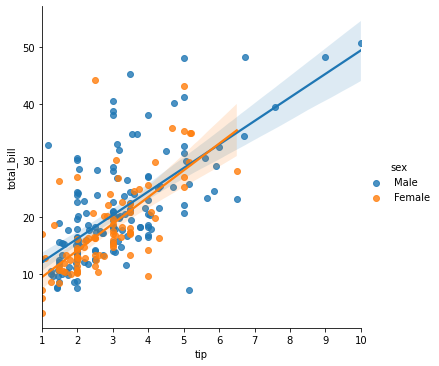

In [41]:
sns.lmplot(x = 'tip', y='total_bill', data=df, hue='sex')
plt.show()